# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers.

Not sure where to begin? Scroll to the bottom to find challenges!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What five countries are responsible for the most profit (by quantity and price of goods sold)?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

In [3]:
file = r'd:\rg67266\Downloads\online_retail.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<Axes: title={'center': 'Check Null Values'}>

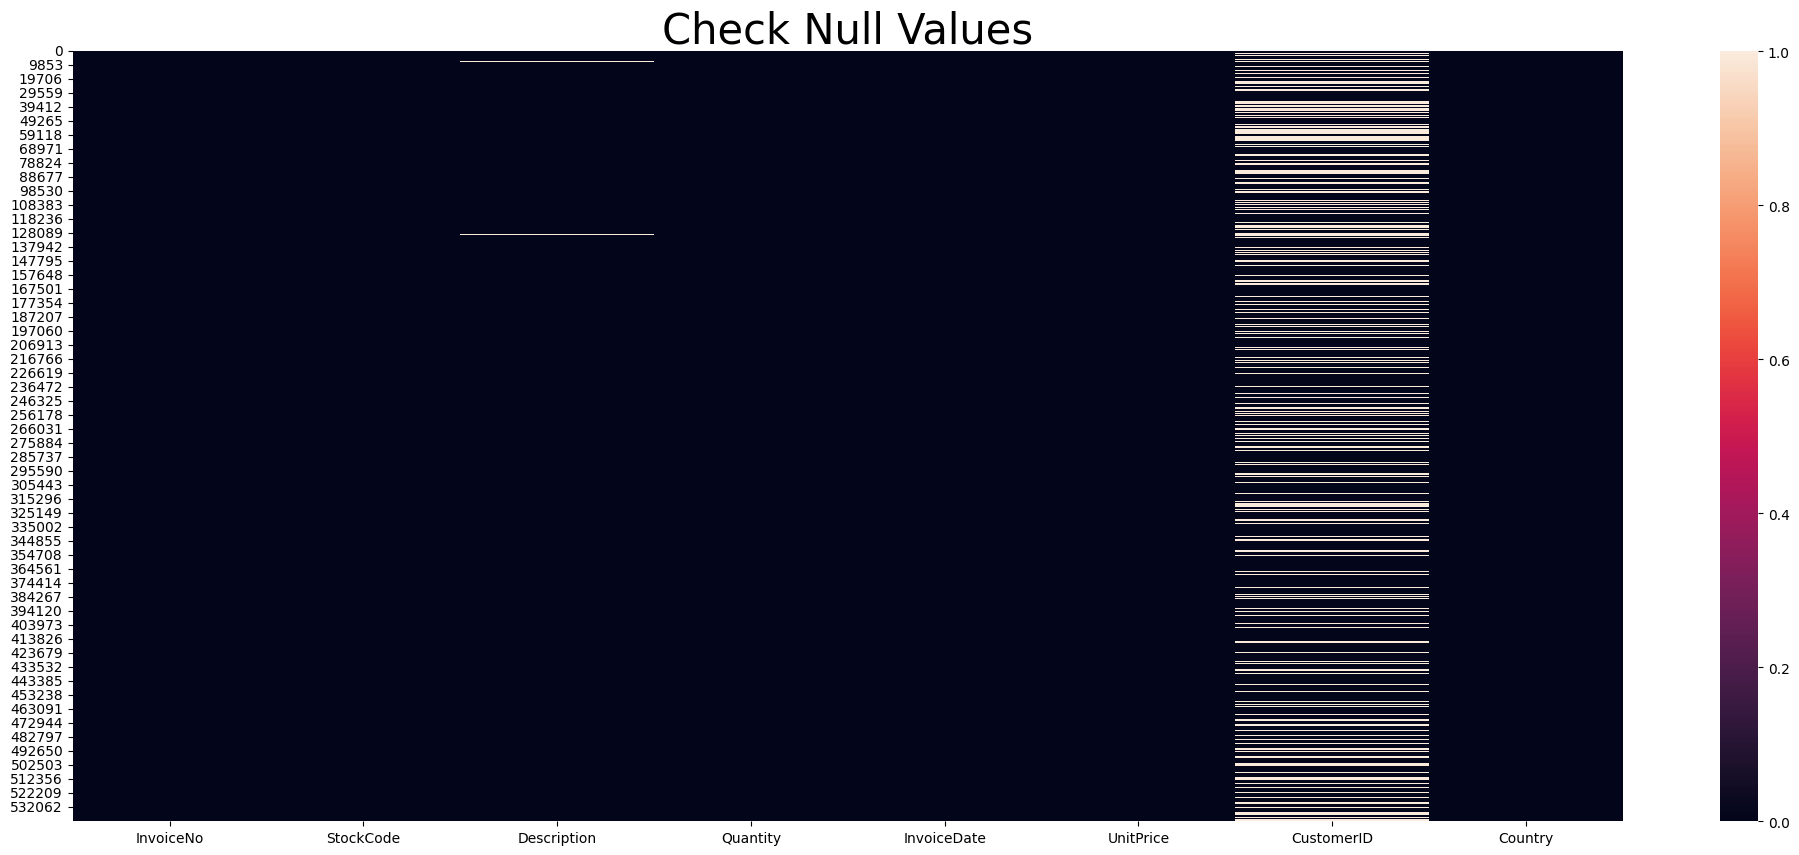

In [8]:
plt.figure(figsize=(25,10))

plt.title('Check Null Values',fontsize=30)
plt.xlabel('Columns Name',fontsize=20)
plt.ylabel('Rows Number',fontsize=20)


sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
null_col = df['CustomerID'].isna()
df[null_col]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/11 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/11 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/11 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/11 10:26,10.79,NaN,United Kingdom


In [11]:
df = df.drop(columns='CustomerID')

In [12]:
null_col2 = df['Description'].isna()

df[null_col2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,United Kingdom
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/11 18:26,0.0,United Kingdom
535326,581203,23406,NaN,15,12/7/11 18:31,0.0,United Kingdom
535332,581209,21620,NaN,6,12/7/11 18:35,0.0,United Kingdom
536981,581234,72817,NaN,27,12/8/11 10:33,0.0,United Kingdom


In [13]:
df = df.dropna(how='any')

<Axes: title={'center': 'Check Null Values'}>

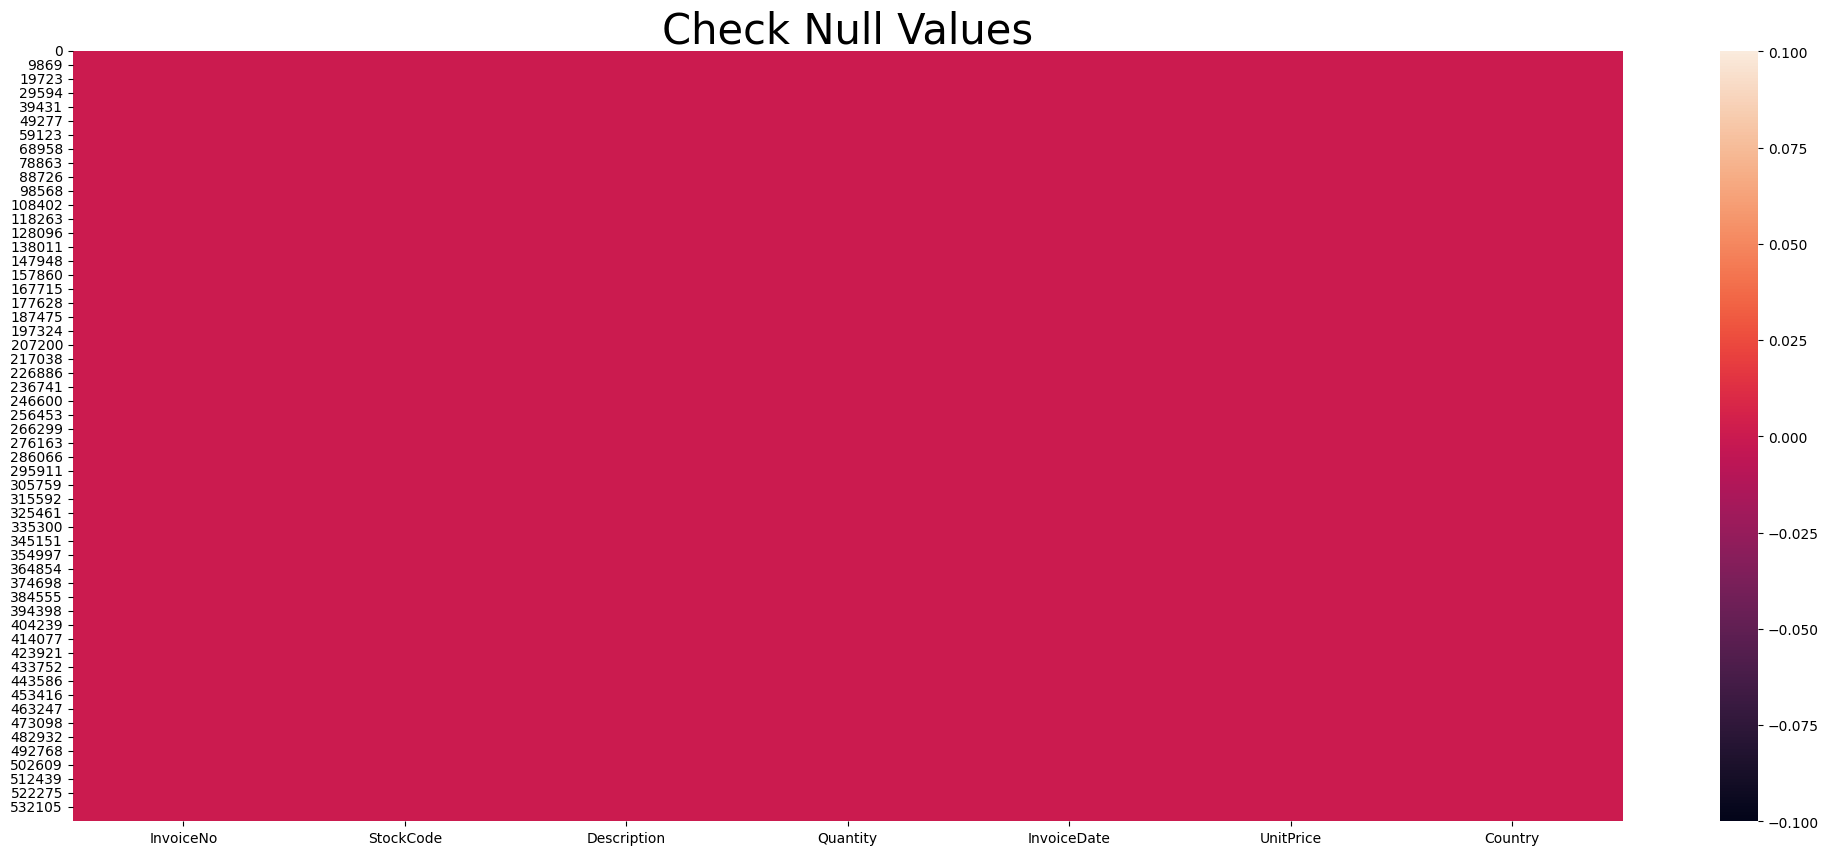

In [14]:
plt.figure(figsize=(25,10))

plt.title('Check Null Values',fontsize=30)
plt.xlabel('Columns Name',fontsize=20)
plt.ylabel('Rows Number',fontsize=20)


sns.heatmap(df.isnull())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 33.0+ MB


In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\rg67266\AppData\Local\Temp\ipykernel_16748\3633860036.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [17]:
df['Year'] = df['InvoiceDate'].dt.year
df['Year'] = df['Year'].astype(np.int64)


In [18]:
df['Month'] = df['InvoiceDate'].dt.month
df['Month'] = df['Month'].astype(np.int64)
df['MonthName'] = df['InvoiceDate'].dt.month_name()


In [19]:
df['Week'] = df['InvoiceDate'].dt.weekday
df['Week'] = df['Week'].astype(np.int64)

In [20]:
def Quarter(intiger):
    months = intiger
    if (months > 10) and (months < 13):
        return 'Q4'
    elif (months > 6) and (months < 11):
        return 'Q3'
    elif (months > 3) and (months < 7):
        return 'Q2'
    elif (months > 0) and (months < 4):
        return 'Q1'



In [21]:
df['Quarter'] = df['Month'].apply(Quarter)

In [22]:
df['TotalSales'] = df['UnitPrice'] * df['Quantity']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   Country      540455 non-null  object        
 7   Year         540455 non-null  int64         
 8   Month        540455 non-null  int64         
 9   MonthName    540455 non-null  object        
 10  Week         540455 non-null  int64         
 11  Quarter      540455 non-null  object        
 12  TotalSales   540455 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 57.7+ MB


In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'Year', 'Month', 'MonthName', 'Week', 'Quarter',
       'TotalSales'],
      dtype='object')

In [25]:
old_col = list(df.columns)
new_col = old_col[0:6] + old_col[-1:] + old_col[6:-1]
df = df[new_col]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalSales,Country,Year,Month,MonthName,Week,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,United Kingdom,2010,12,December,2,Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,United Kingdom,2010,12,December,2,Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,United Kingdom,2010,12,December,2,Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,United Kingdom,2010,12,December,2,Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,United Kingdom,2010,12,December,2,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,France,2011,12,December,4,Q4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,France,2011,12,December,4,Q4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,France,2011,12,December,4,Q4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,France,2011,12,December,4,Q4


In [26]:
dtype = df.dtypes.value_counts().reset_index()
dtype

,index,count
0,object,6
1,int64,4
2,float64,2
3,datetime64[ns],1


<Axes: title={'center': 'Data Types Values in columns'}, xlabel='index', ylabel='count'>

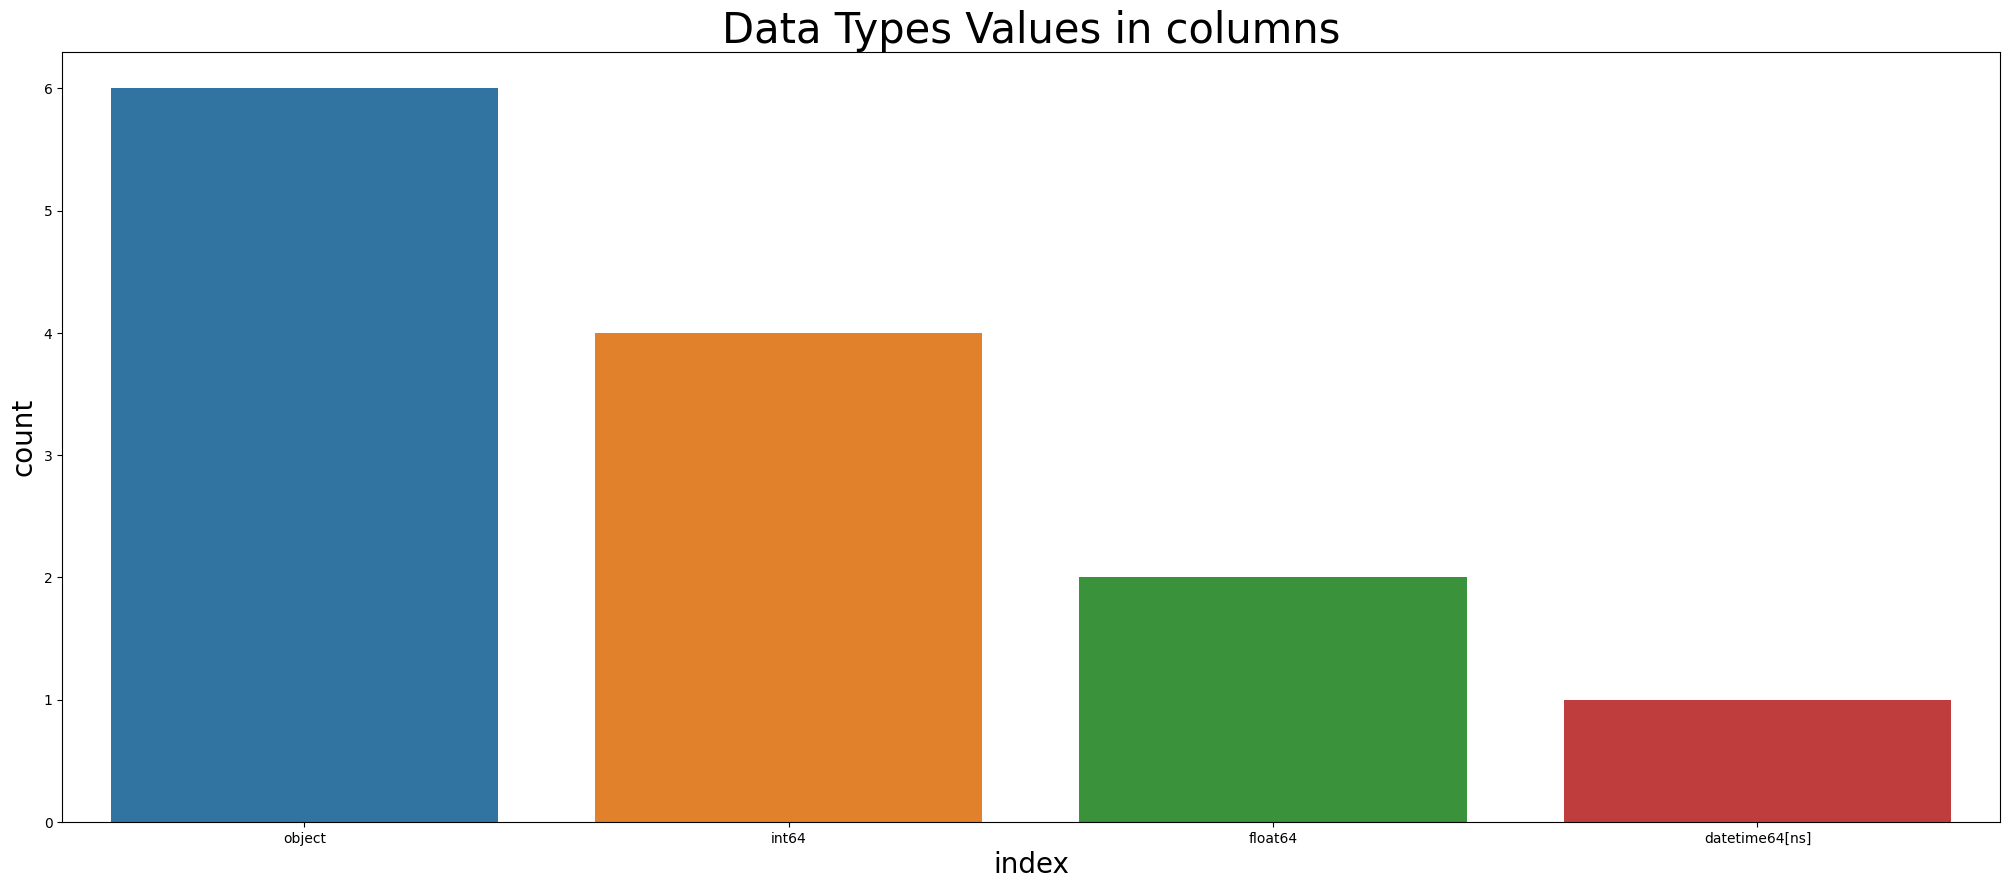

In [27]:
plt.figure(figsize=(25,10))

plt.title('Data Types Values in columns',fontsize=30)
plt.xlabel('Data Types',fontsize=20)
plt.ylabel('Count',fontsize=20)


sns.barplot(data = dtype, x='index' ,y='count')

*  The Datasets have most "String" and "intiger" columns.

In [28]:
invoice_count = df.duplicated('InvoiceNo')
invoice_count.sum()

516009

In [29]:
df.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
Quantity,540455.0,9.603129,218.007598,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,540455.0,4.623519,96.889628,-11062.06,1.25,2.08,4.13,38970.0
TotalSales,540455.0,18.036188,379.318894,-168469.60,3.48,9.84,17.40,168469.6
Year,540455.0,2010.921629,0.268755,2010.00,2011.00,2011.00,2011.00,2011.0
Month,540455.0,7.556692,3.508805,1.00,5.00,8.00,11.00,12.0
Week,540455.0,2.431744,1.845841,0.00,1.00,2.00,4.00,6.0


In [30]:
best_month = df.groupby(['MonthName','Month'])['TotalSales'].sum().reset_index() # Grouping The ata with total Sales Values
best_month = best_month.sort_values('Month') # Sorting with Months
best_month

,MonthName,Month,TotalSales
4,January,1,560000.260
3,February,2,498062.650
7,March,3,683267.080
0,April,4,493207.121
8,May,5,723333.510
6,June,6,691123.120
5,July,7,681300.111
1,August,8,682680.510
11,September,9,1019687.622
10,October,10,1070704.670


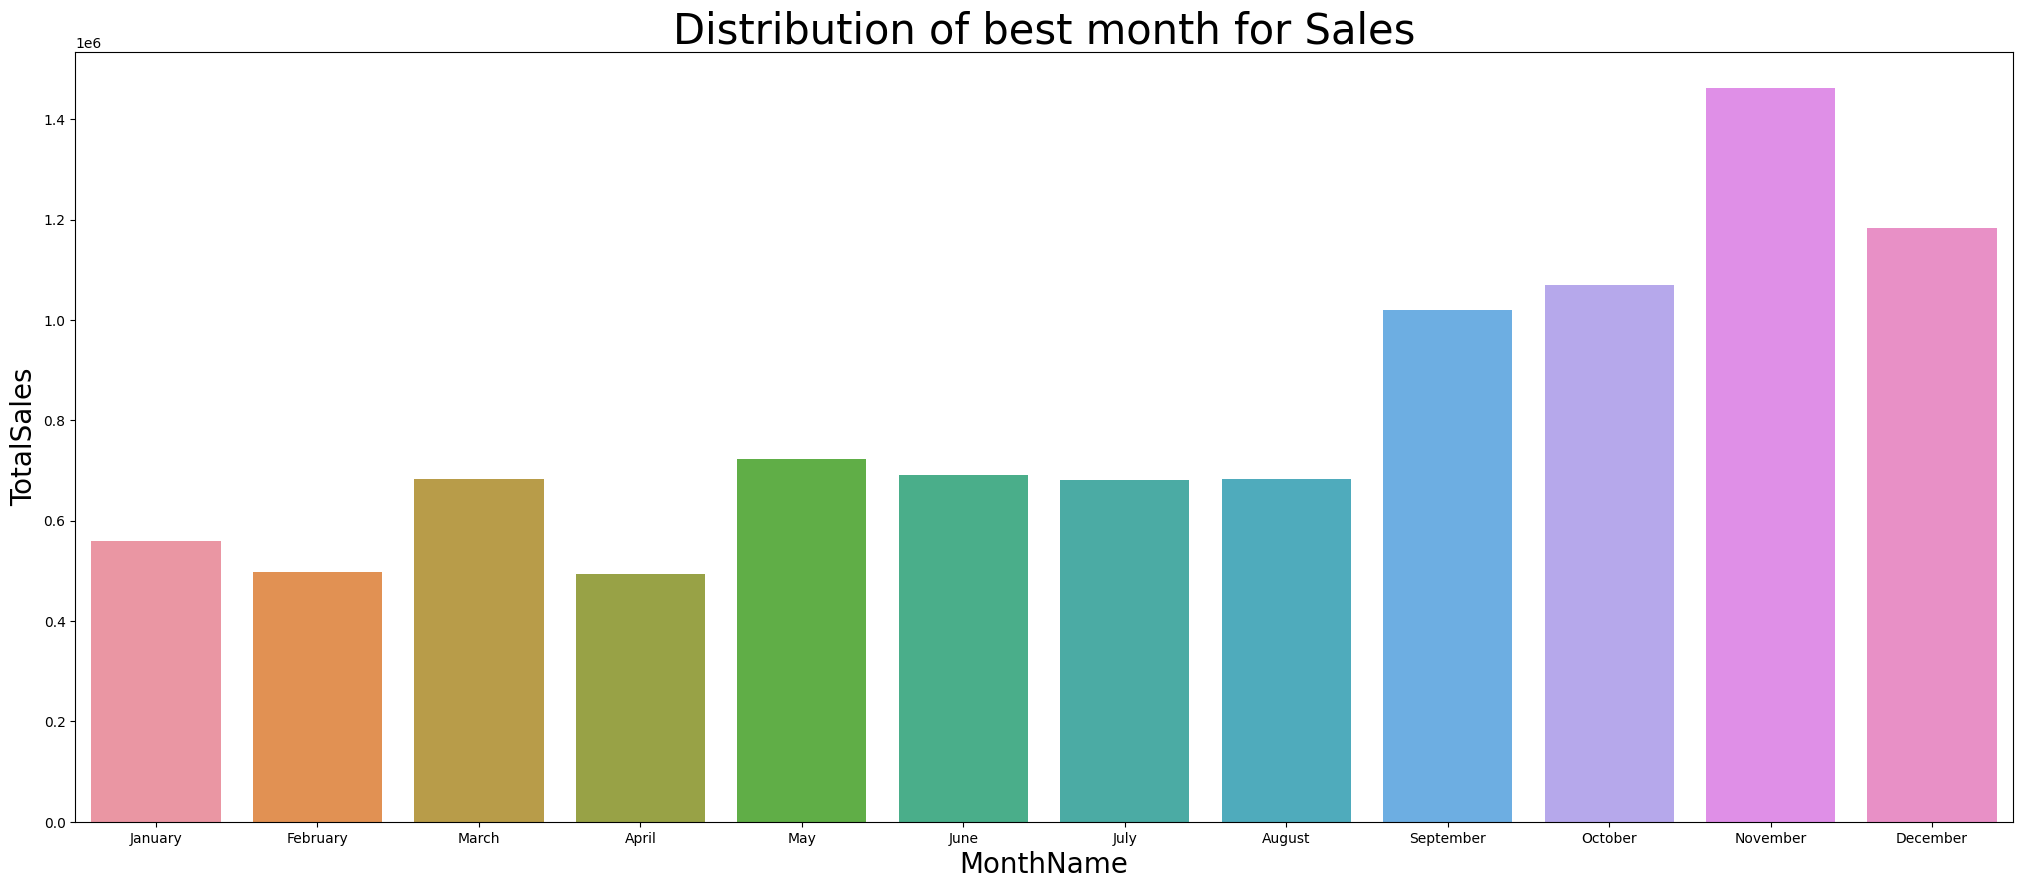

In [31]:
plt.figure(figsize=(25,10))

plt.title('Distribution of best month for Sales',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)


sns.barplot(data = best_month, x='MonthName' ,y='TotalSales')



plt.show()

* November is the best month for Sales

In [32]:
ydf = df.groupby('Year')['TotalSales'].sum().reset_index()
ydf

,Year,TotalSales
0,2010,748957.020
1,2011,8998790.914


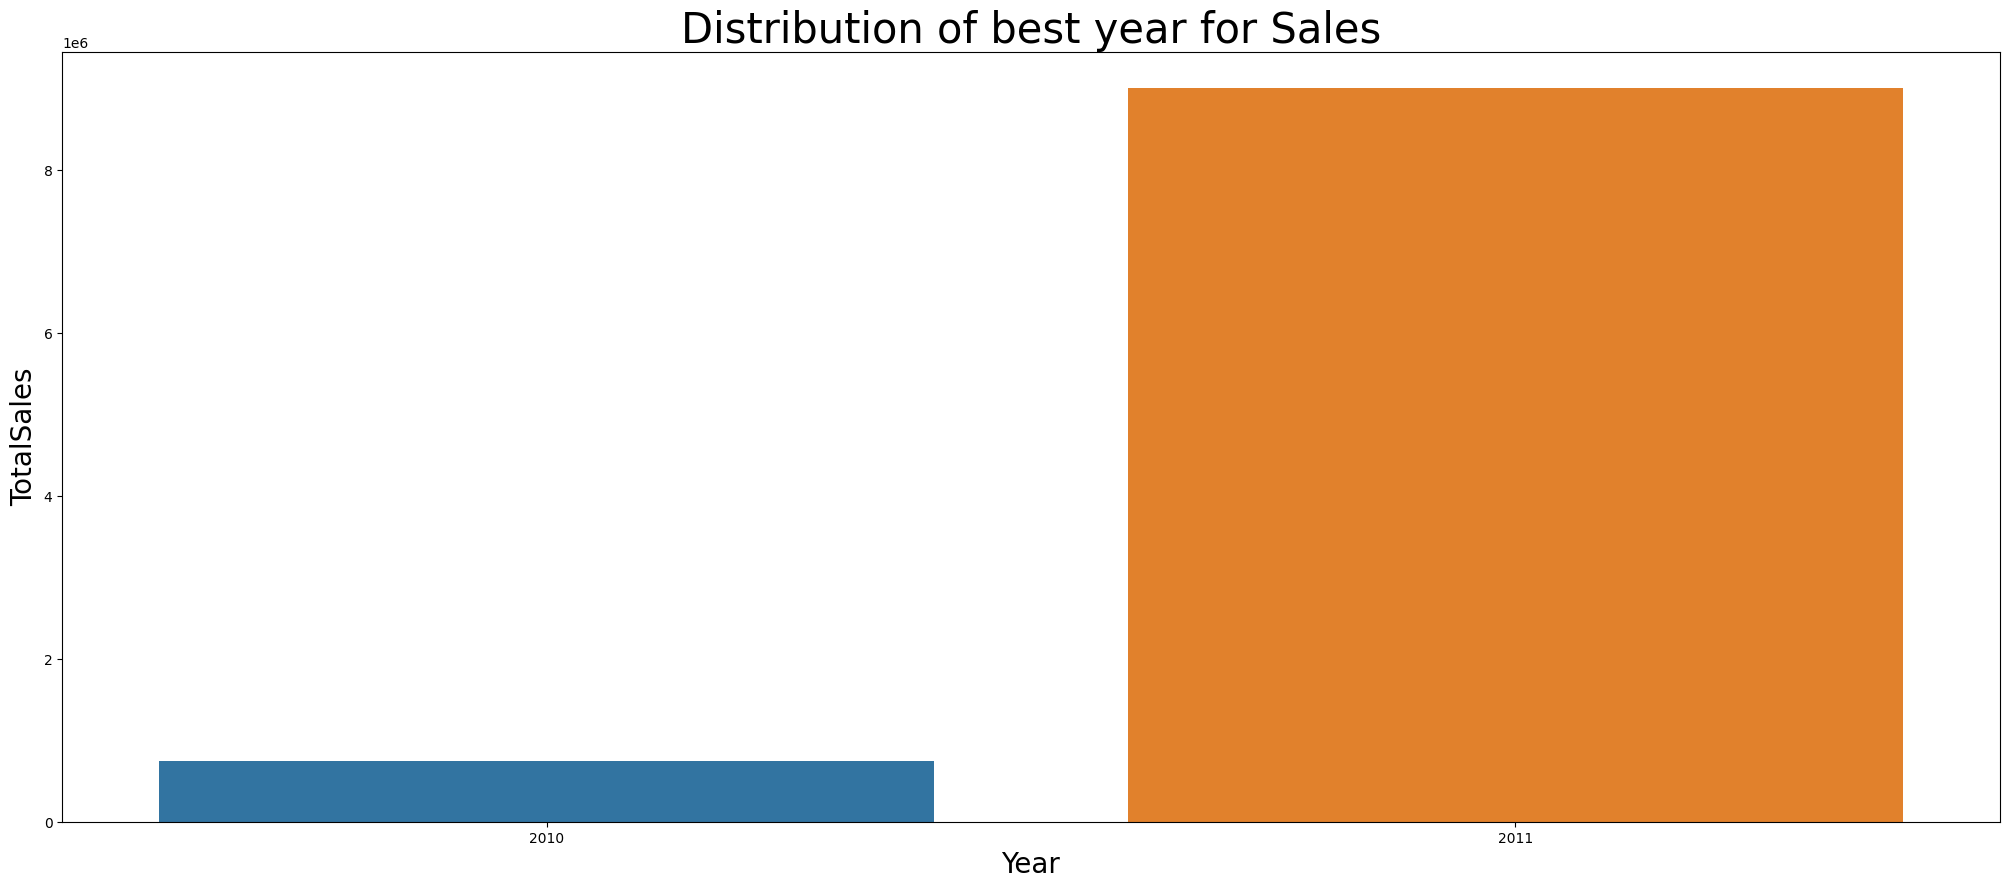

In [33]:
plt.figure(figsize=(25,10))

plt.title('Distribution of best year for Sales',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)


sns.barplot(data = ydf, x='Year' ,y='TotalSales')



plt.show()

* 2011 is the best year for sales

In [34]:
Qdf = df.groupby('Quarter')['TotalSales'].sum().reset_index()
Qdf

,Quarter,TotalSales
0,Q1,1741329.990
1,Q2,1907663.751
2,Q3,3454372.913
3,Q4,2644381.280


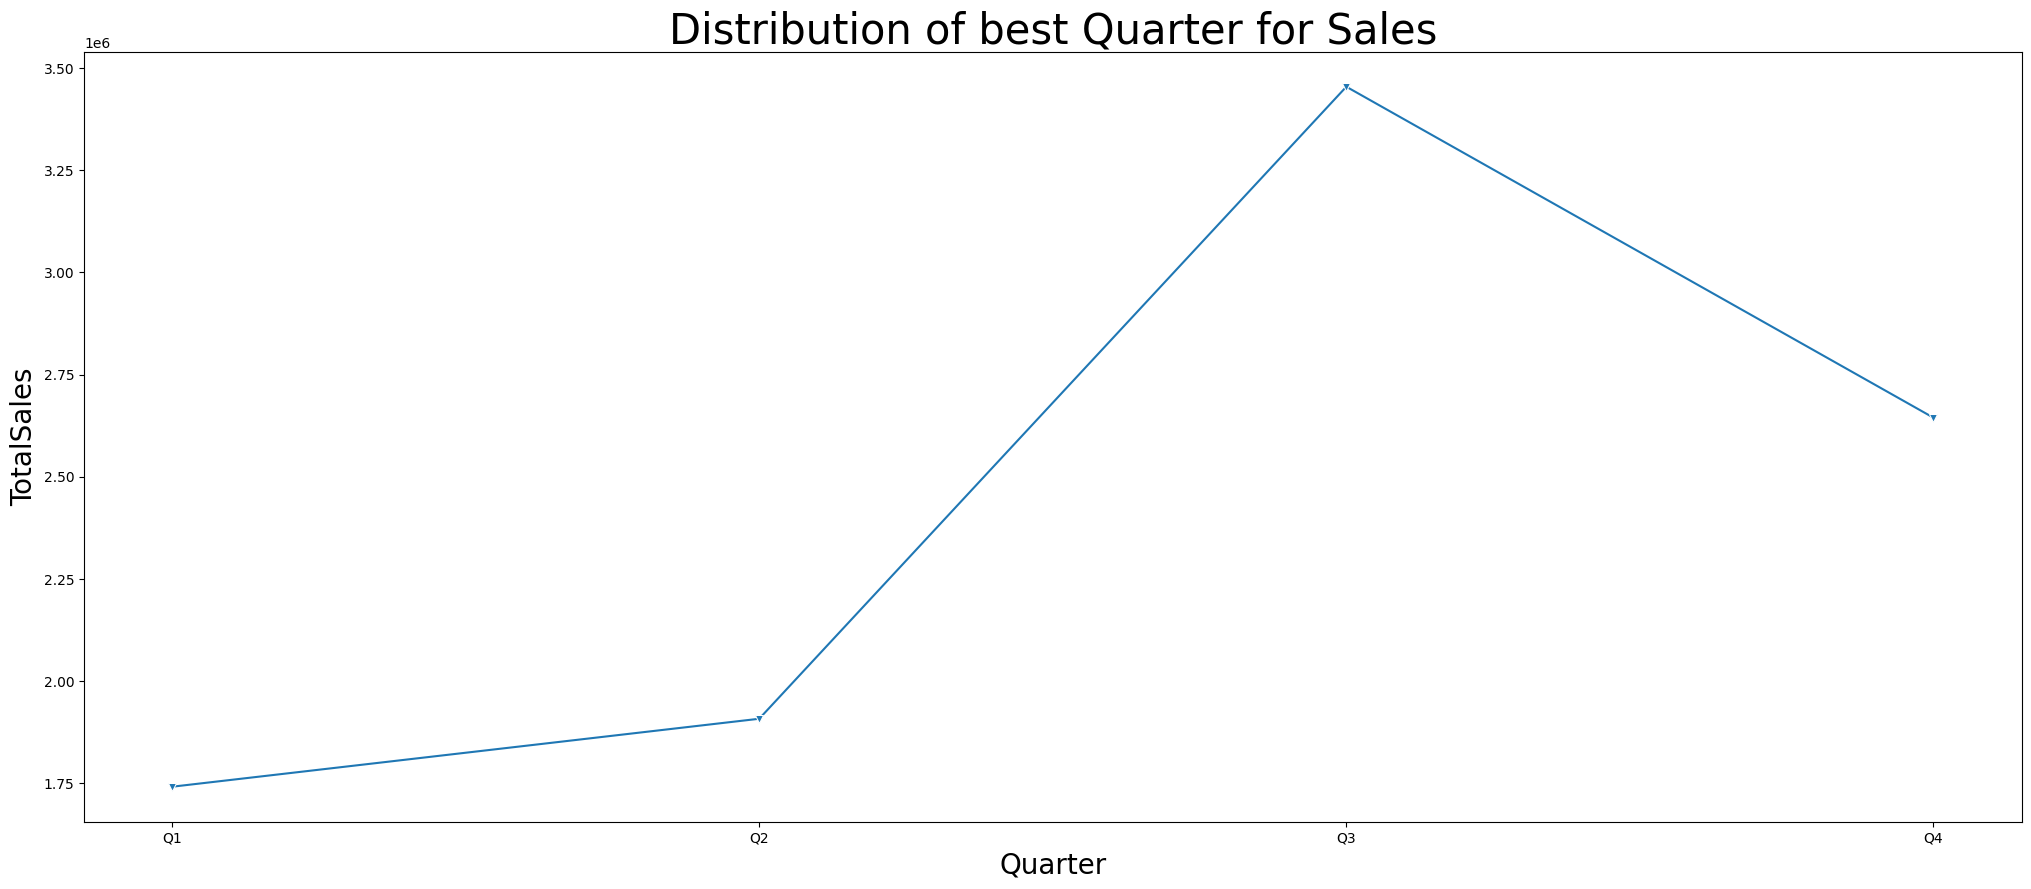

In [35]:
plt.figure(figsize=(25,10))

plt.title('Distribution of best Quarter for Sales',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)


sns.lineplot(data = Qdf, x='Quarter' ,y='TotalSales', marker='v')



plt.show()

* Q3 is the best for sales

In [36]:
Cdf = df.groupby('Country')['TotalSales'].sum().reset_index().sort_values('TotalSales',ascending=False).head(10)
Cdf

,Country,TotalSales
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


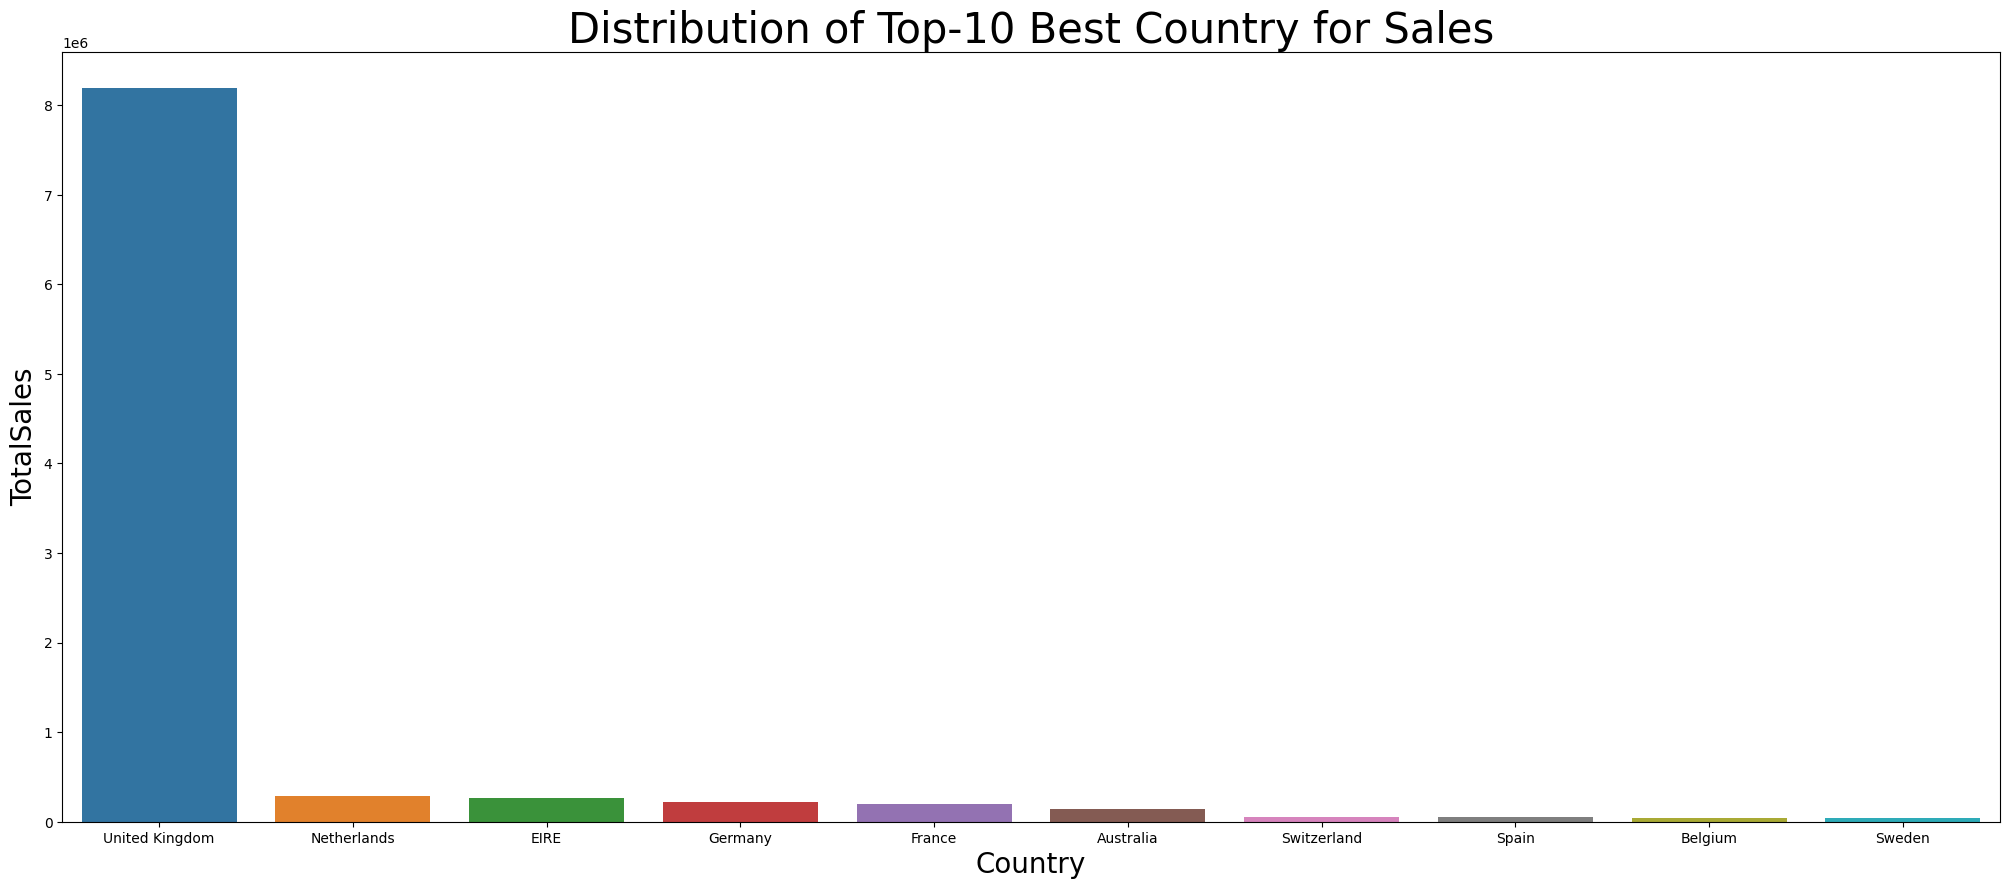

In [37]:
plt.figure(figsize=(25,10))

plt.title('Distribution of Top-10 Best Country for Sales',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)


sns.barplot(data = Cdf, x='Country' ,y='TotalSales')



plt.show()

* The united Kingdom is the best for sales

In [38]:
df['Description'].value_counts().reset_index().head(n=10)

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638
5,ASSORTED COLOUR BIRD ORNAMENT,1501
6,SET OF 3 CAKE TINS PANTRY DESIGN,1473
7,PACK OF 72 RETROSPOT CAKE CASES,1385
8,LUNCH BAG BLACK SKULL.,1350
9,NATURAL SLATE HEART CHALKBOARD,1280


In [39]:
tdf = df.groupby('Description')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False).head(n=10)
tdf

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


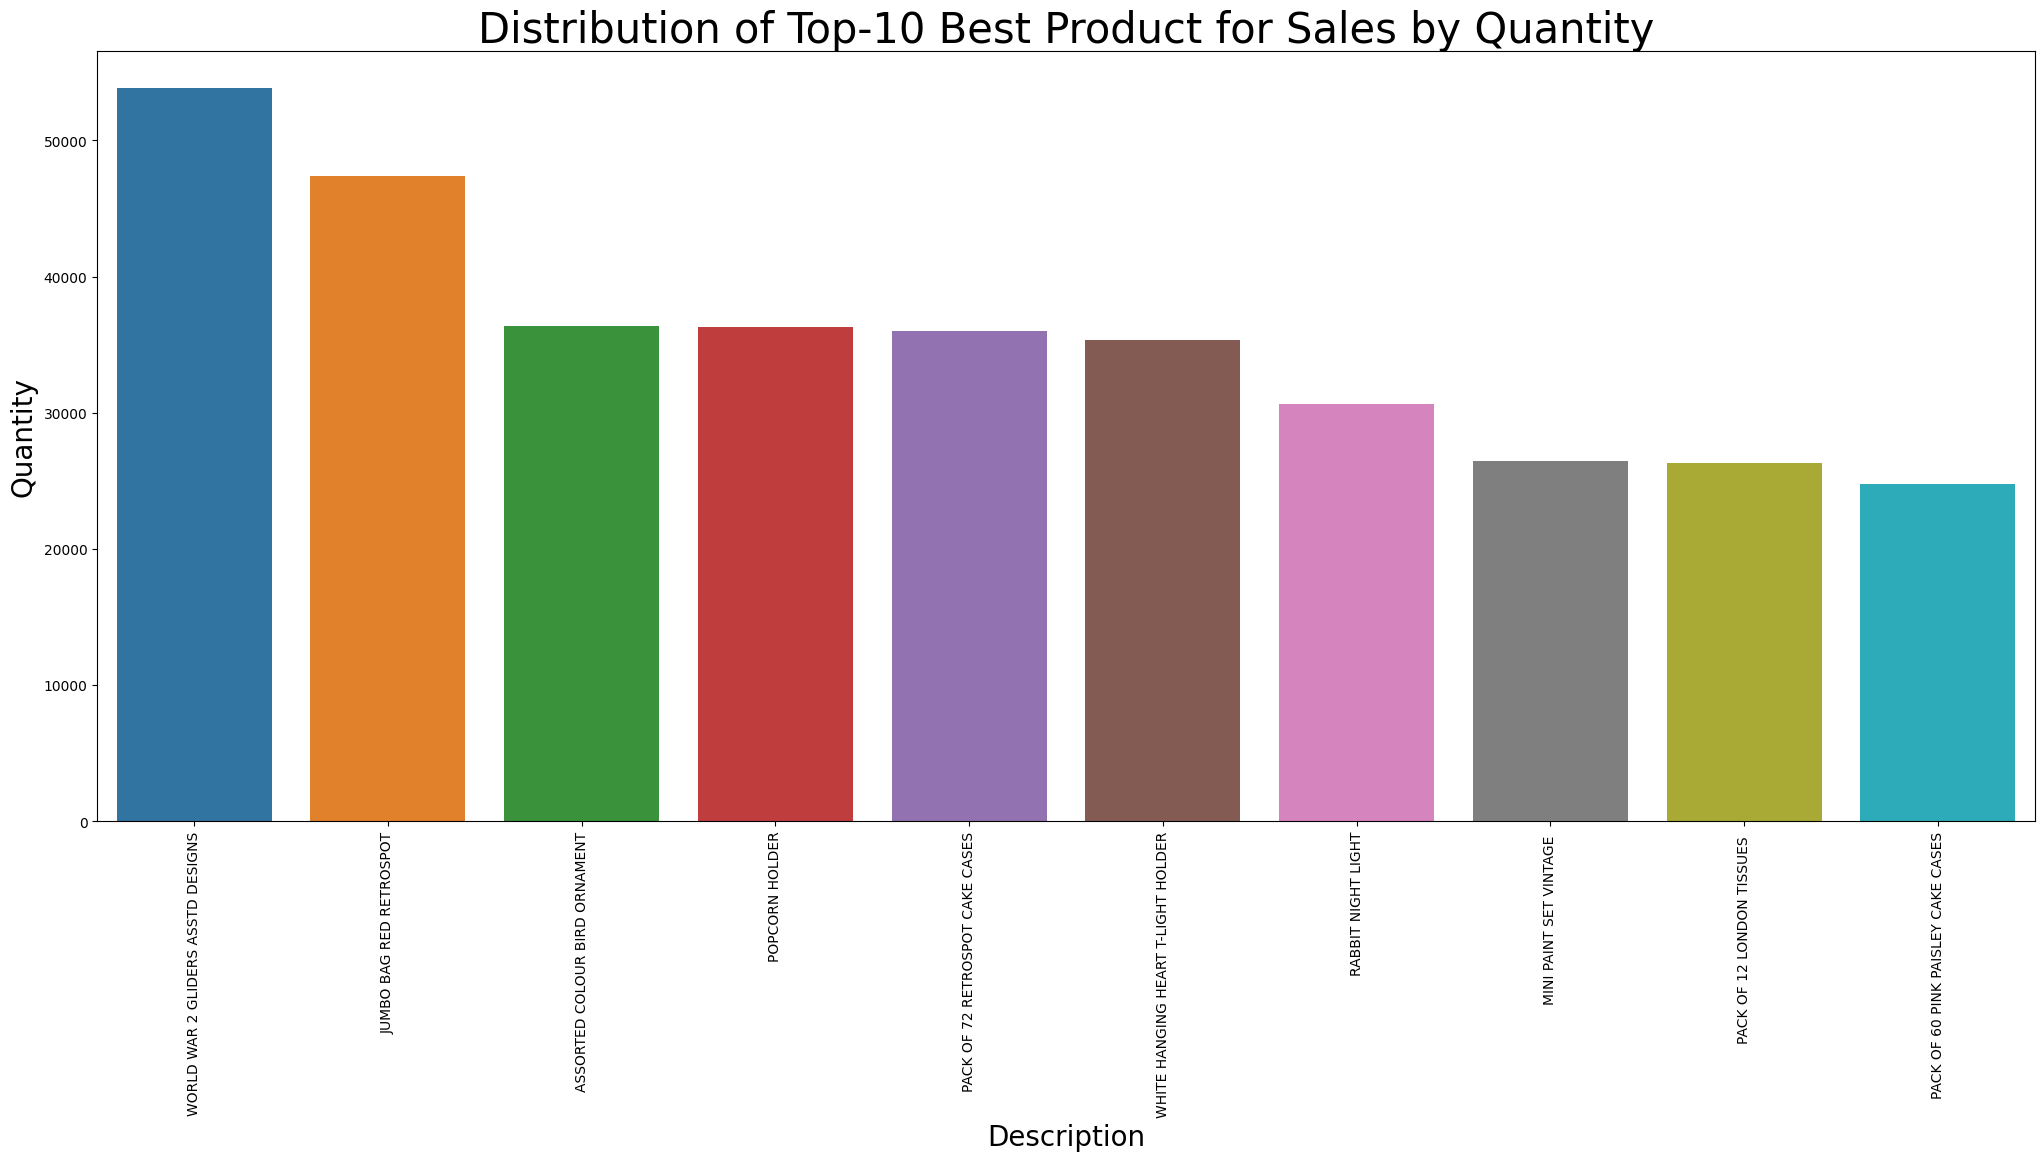

In [40]:
plt.figure(figsize=(25,10))

plt.title('Distribution of Top-10 Best Product for Sales by Quantity',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
plt.xticks(rotation=90)


sns.barplot(data = tdf, x='Description' ,y='Quantity')



plt.show()

* WORLD WAR 2 GLIDERS ASSTD DESIGNS is the most sales product.

In [41]:
Adf = df.groupby('Country')['TotalSales'].mean().reset_index().sort_values('TotalSales',ascending=False).head(30)
Adf

,Country,TotalSales
24,Netherlands,120.059696
0,Australia,108.877895
20,Japan,98.716816
32,Sweden,79.211926
9,Denmark,48.247147
22,Lithuania,47.458857
30,Singapore,39.827031
21,Lebanon,37.641778
4,Brazil,35.737500
16,Hong Kong,35.128611


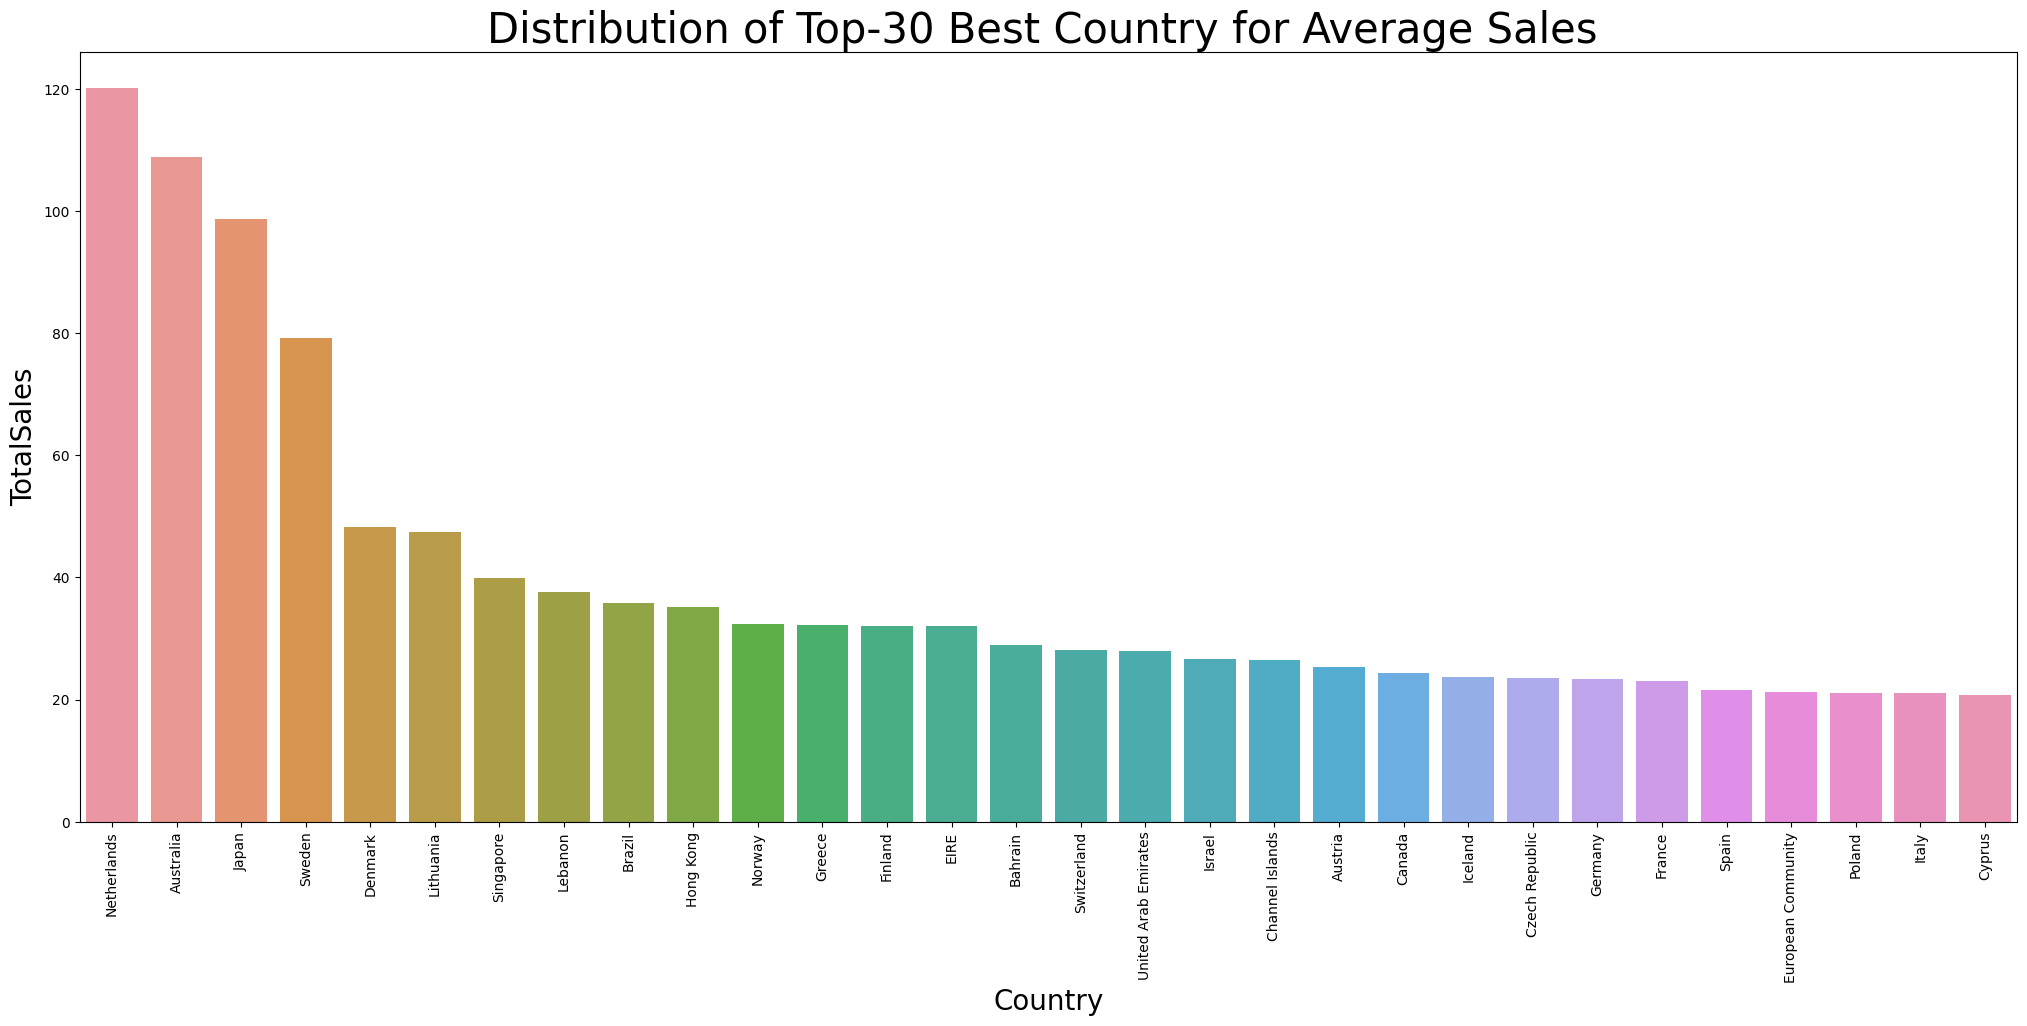

In [51]:
plt.figure(figsize=(25,10))

plt.title('Distribution of Top-30 Best Country for Average Sales ',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
plt.xticks(rotation=90)


sns.barplot(data = Adf, x='Country' ,y='TotalSales')



plt.show()

* Netherlands and Australia are best countries in average sales in price.


In [49]:
AQdf = df.groupby('Country')['Quantity'].mean().reset_index().sort_values('Quantity',ascending=False).head(30)
AQdf

,Country,Quantity
24,Netherlands,84.406580
32,Sweden,77.136364
20,Japan,70.441341
0,Australia,66.444003
30,Singapore,22.855895
9,Denmark,21.048843
8,Czech Republic,19.733333
22,Lithuania,18.628571
5,Canada,18.298013
25,Norway,17.722836


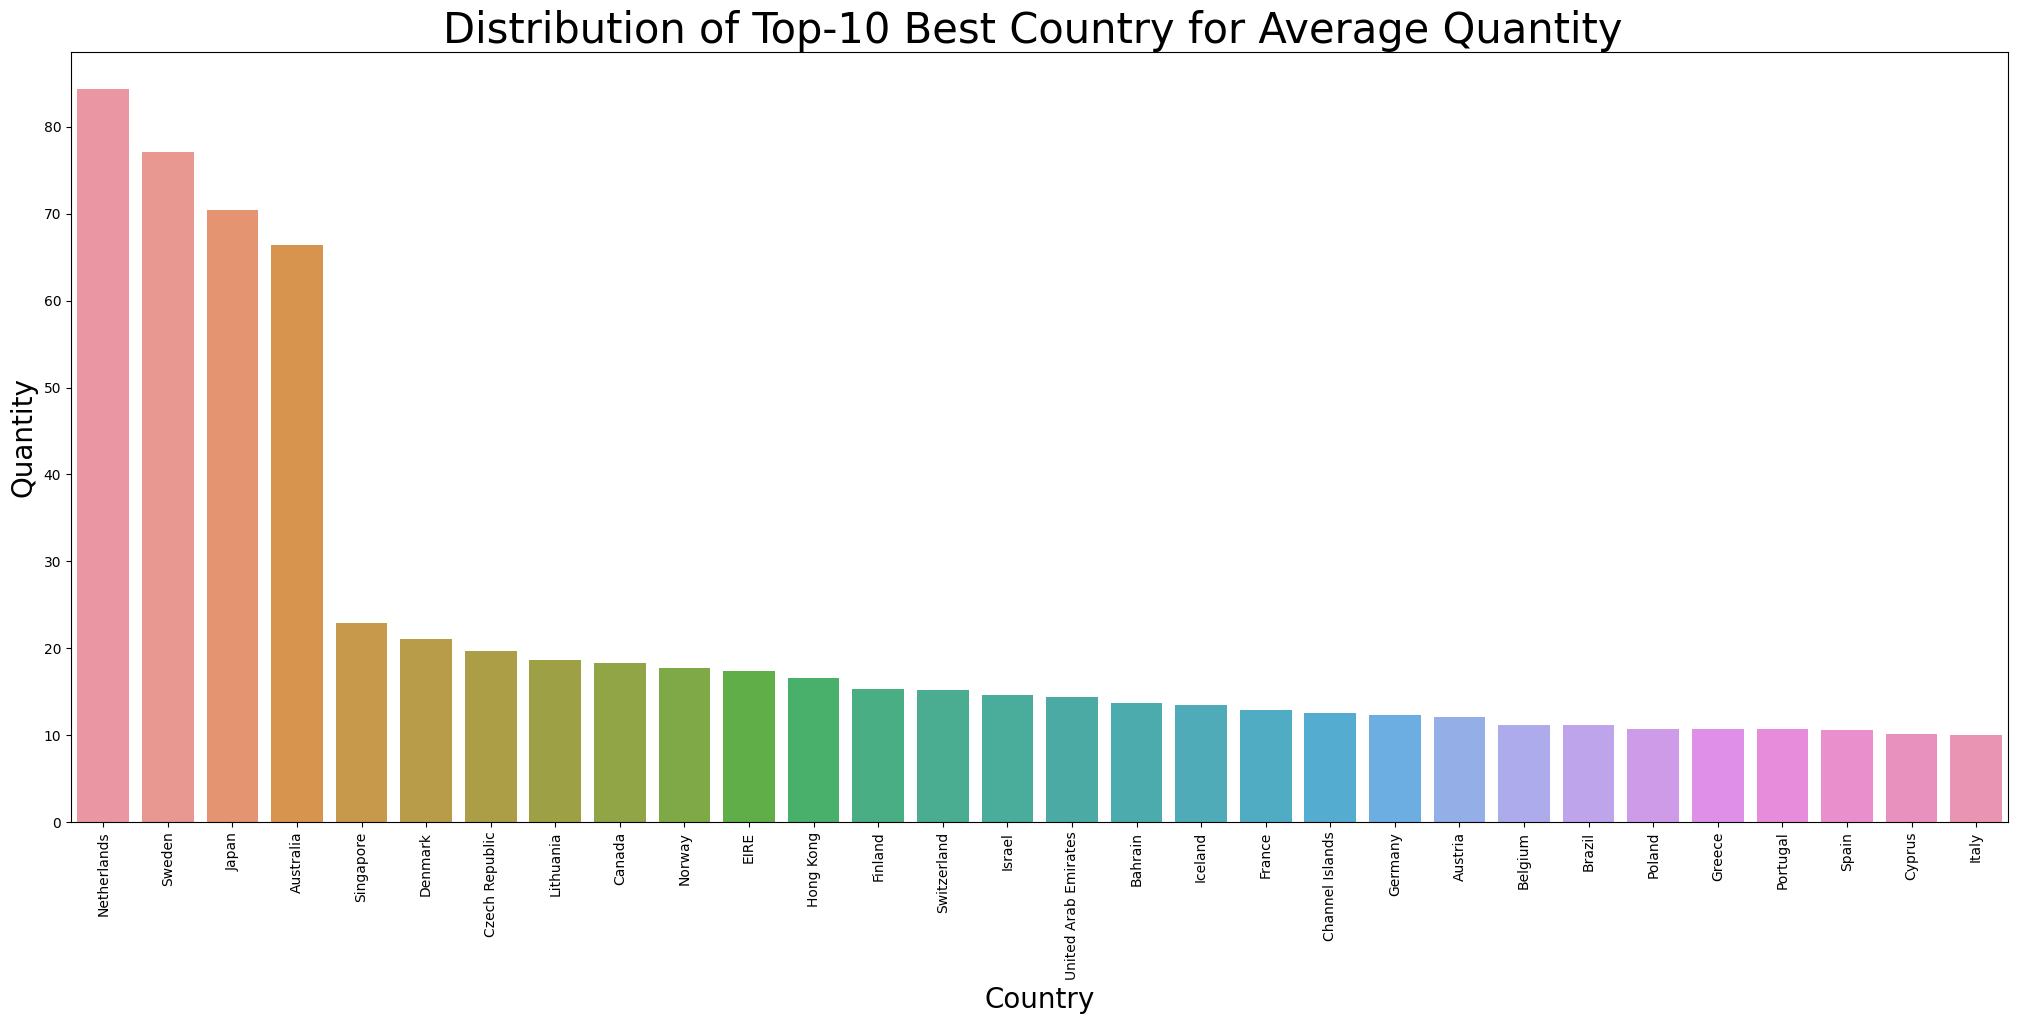

In [52]:
plt.figure(figsize=(25,10))

plt.title('Distribution of Top-10 Best Country for Average Quantity ',fontsize=30)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
plt.xticks(rotation=90)


sns.barplot(data = AQdf, x='Country' ,y='Quantity')



plt.show()

In [45]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,540455.0,9.603129,-80995.0,1.0,3.0,10.0,80995.0,218.007598
InvoiceDate,540455,2011-07-04 16:20:42.947035392,2010-12-01 08:26:00,2011-03-28 11:49:00,2011-07-20 11:38:00,2011-10-19 11:49:00,2011-12-09 12:50:00,NaN
UnitPrice,540455.0,4.623519,-11062.06,1.25,2.08,4.13,38970.0,96.889628
TotalSales,540455.0,18.036188,-168469.6,3.48,9.84,17.4,168469.6,379.318894
Year,540455.0,2010.921629,2010.0,2011.0,2011.0,2011.0,2011.0,0.268755
Month,540455.0,7.556692,1.0,5.0,8.0,11.0,12.0,3.508805
Week,540455.0,2.431744,0.0,1.0,2.0,4.0,6.0,1.845841
